## Introduction

Heart disease becomes more and more common in our daily life and there are a lot of reasons that are possible to cause it. Here in this simple study, we are going to use classification methods, logistic regression and KNN, to predict whether a patient has heart disease or not.

## Data Description

This database comes from [Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci), which contains 303 data points in total.

#### Features: 
* age - age in years 
* sex - (1 = male; 0 = female) 
* cp - chest pain type 
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) 
* chol - serum cholestoral in mg/dl 
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg - resting electrocardiographic results 
* thalach - maximum heart rate achieved 
* exang - exercise induced angina (1 = yes; 0 = no) 
* oldpeak - ST depression induced by exercise relative to rest 
* slope - the slope of the peak exercise ST segment 
* ca - number of major vessels (0-3) colored by flourosopy 
* thal - 3 = normal; 6 = fixed defect; 7 = reversable defect 
* target - have disease or not (1=yes, 0=no)

## Analysis

### Brief Data Exploration

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os

In [5]:
df=pd.read_csv("C:\Documents\Microeconometrics\Assignments3\heart-disease-uci/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


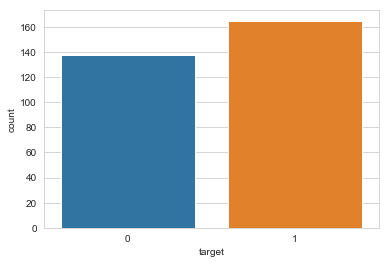

In [28]:
sns.countplot(x="target", data=df)
plt.show()

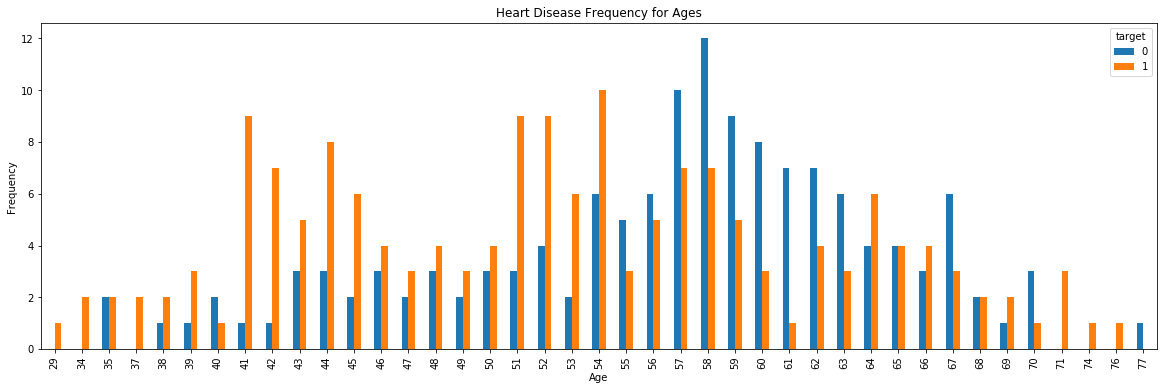

In [8]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

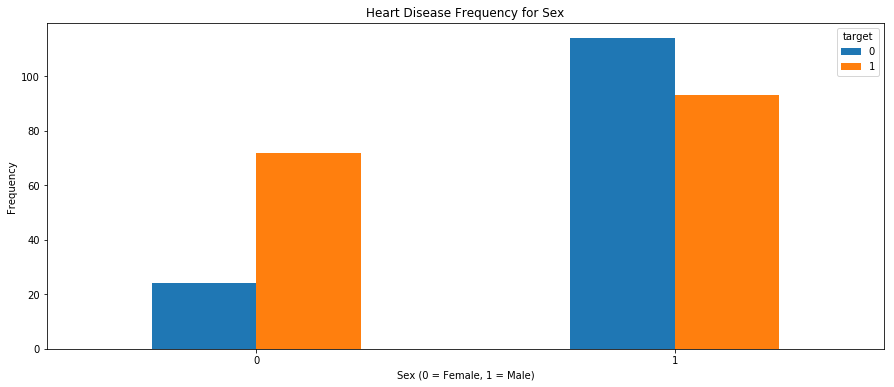

In [12]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

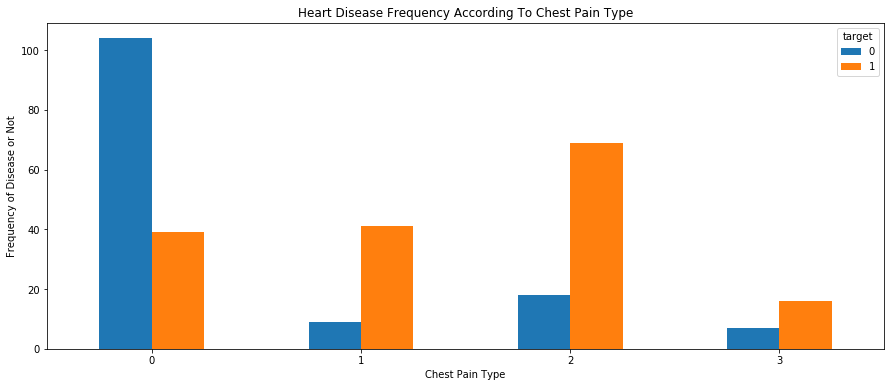

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Data Transformation

We are going to transform "cp", "thal" and "slope" into dummy variables for more convenient analysis.

In [13]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


### Logistic Regression

In [16]:
y=df.target.values
x_data=df.drop(['target'],axis=1)

#Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

#Splitting training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

C:\Users\wow97\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.87


### K-Nearest Neighbor Classification (KNN)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train, y_train)
prediction = knn.predict(x_test)
print("Accuracy of {} NN Score on test set: {:.2f}".format(5, knn.score(x_test, y_test)))

Accuracy of 5 NN Score on test set: 0.85


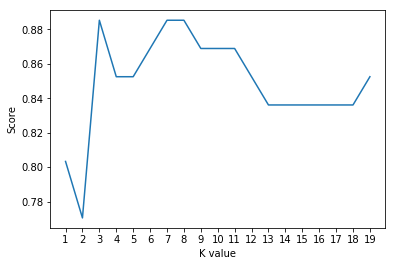

Maximum KNN Score is 0.89
The best K is 3, 7 and 8


In [25]:
# find the best K
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

print("Maximum KNN Score is {:.2f}".format((max(scoreList))))
print("The best K is 3, 7 and 8")

## Comparing the Two Models

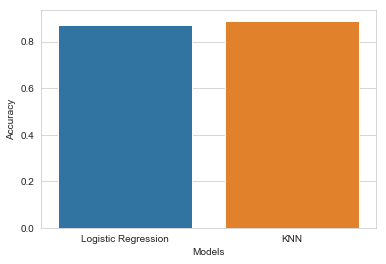

In [29]:
#Accuracy
methods = ["Logistic Regression", "KNN"]
accuracy=[0.87,0.89]

sns.set_style("whitegrid")
plt.ylabel("Accuracy")
plt.xlabel("Models")
sns.barplot(x=methods, y=accuracy)
plt.show()

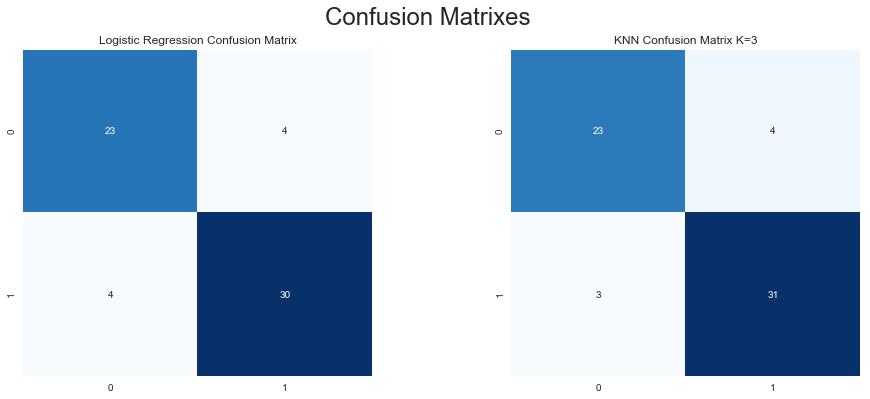

In [39]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

y_head_lr = logreg.predict(x_test)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(x_train, y_train)
y_head_knn = knn3.predict(x_test)

cm_lr = confusion_matrix(y_test,y_head_lr)
cm_knn = confusion_matrix(y_test,y_head_knn)

plt.figure(figsize=(15,6))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace=0.4)

plt.subplot(1,2,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.subplot(1,2,2)
plt.title("KNN Confusion Matrix K=3")
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False)

plt.show()



According to accuracy and confusion matrix above, we can see that both models work well with the data but KNN is slightly better. Therefore, we choose KNN (K=3) as the final model to predict if a patient have heart disease or not. 

## Reference

[Building A Logistic Regression in Python, Step by Step](https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8)

[Heart Disease - Classifications (Machine Learning) in Kaggle](https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning)